In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csvpath = ("../csv/Position_Salaries.csv")

In [3]:
dataset = pd.read_csv(csvpath)

In [4]:
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


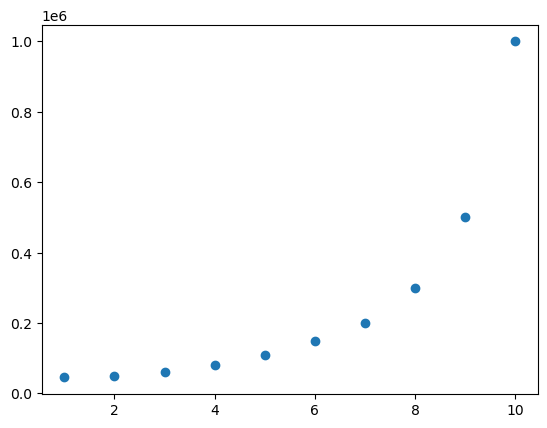

In [5]:
plt.scatter(x = dataset["Level"], y= dataset["Salary"])

In [6]:
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = dataset[["Level"]]


In [8]:
y = dataset["Salary"]

In [9]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pf = PolynomialFeatures(degree = 1, include_bias = False)

In [12]:
X_poly = pf.fit_transform(X)

In [13]:
X_poly

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

Building the model

In [14]:
from sklearn.linear_model import LinearRegression 

In [15]:
plr_model = LinearRegression()

In [16]:
plr_model.fit(X_poly, y)

LinearRegression()

In [17]:
#plr_model --- train MLR model

In [18]:
plr_model.intercept_

-195333.3333333332

In [19]:
np.set_printoptions(precision = 2, suppress = True)

In [20]:
plr_model.coef_

array([80878.79])

Prediction

In [21]:
y_pred = plr_model.predict(X_poly)

In [22]:
y_pred

array([-114454.55,  -33575.76,   47303.03,  128181.82,  209060.61,
        289939.39,  370818.18,  451696.97,  532575.76,  613454.55])

In [23]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Evaluation

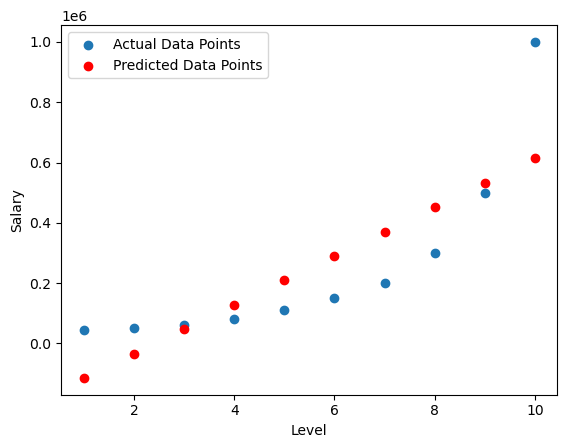

In [35]:
plt.scatter(X, y, label = "Actual Data Points")
plt.scatter(X, y_pred, label = "Predicted Data Points", color = "red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
mse = mean_squared_error(y, y_pred)

In [26]:
rmse = np.sqrt(mse)

In [27]:
rmse

163388.73519272613

In [29]:
mae = mean_absolute_error(y, y_pred)

In [30]:
mae

128454.54545454546

In [31]:
print("Test data r2_score::", r2_score(y, y_pred))

Test data r2_score:: 0.6690412331929895


In [36]:
level = 5

In [37]:
level = np.array([[level]])

In [38]:
level


array([[5]])

In [40]:
pf.transform(level)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[5.]])

In [39]:
plr_model.predict(level)

array([209060.61])